In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn import linear_model

# Leitura de dados

In [ ]:
train = pd.read_csv("dados_lab_classificacao/train.csv")
test = pd.read_csv("dados_lab_classificacao/test.csv")

train.info()

# Descarte de colunas
Avaliando as colunas, podemos perceber que algumas podem ser descartadas por não fazerem diferença na predição como nome do candidato, ocupação, cargo e estado civil.

In [81]:
train = train.drop(['nome','sequencial_candidato', 'cargo', 'grau','ocupacao', 'estado_civil'], axis=1)
train.head()

,ano,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo
0,2014,AC,PSOL,3,3,1580.00,526.67,0.00,1500.00,0.00,0.00,80.0,3,3,1580.00,526.67,MASCULINO
1,2014,AC,PSOL,5,5,3180.00,636.00,0.00,3100.00,0.00,0.00,80.0,6,5,3130.02,521.67,MASCULINO
2,2014,AC,PSB,40,38,336793.13,8419.83,1923.07,65700.00,154170.06,115000.00,0.0,145,139,326869.78,2254.27,MASCULINO
3,2014,AC,PT,29,29,156719.32,5404.11,39122.32,68783.84,17000.00,6813.16,25000.0,136,121,241016.07,1772.18,MASCULINO
4,2014,AC,PT,160,146,737073.00,4606.71,10000.00,347073.00,277000.00,78000.00,25000.0,518,354,567401.15,1095.37,MASCULINO


In [164]:
test = pd.read_csv("dados_lab_classificacao/test.csv")
test = test.drop(['nome', 'cargo', 'grau','ocupacao', 'estado_civil'], axis=1)
test.head()

,ano,sequencial_candidato,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo
0,2014,10000000135,AC,PSOL,3,3,1580.00,526.67,0.00,1500.00,0.00,0.00,80.0,3,3,1580.00,526.67,MASCULINO
1,2014,10000000142,AC,PSOL,5,5,3180.00,636.00,0.00,3100.00,0.00,0.00,80.0,6,5,3130.02,521.67,MASCULINO
2,2014,10000000158,AC,PSB,40,38,336793.13,8419.83,1923.07,65700.00,154170.06,115000.00,0.0,145,139,326869.78,2254.27,MASCULINO
3,2014,10000000161,AC,PT,29,29,156719.32,5404.11,39122.32,68783.84,17000.00,6813.16,25000.0,136,121,241016.07,1772.18,MASCULINO
4,2014,10000000163,AC,PT,160,146,737073.00,4606.71,10000.00,347073.00,277000.00,78000.00,25000.0,518,354,567401.15,1095.37,MASCULINO


# Correlação
Verificaremos agora a correlação das colunas restantes, a fim de identificar correlações fortes que nos permitam eliminar algumas delas.

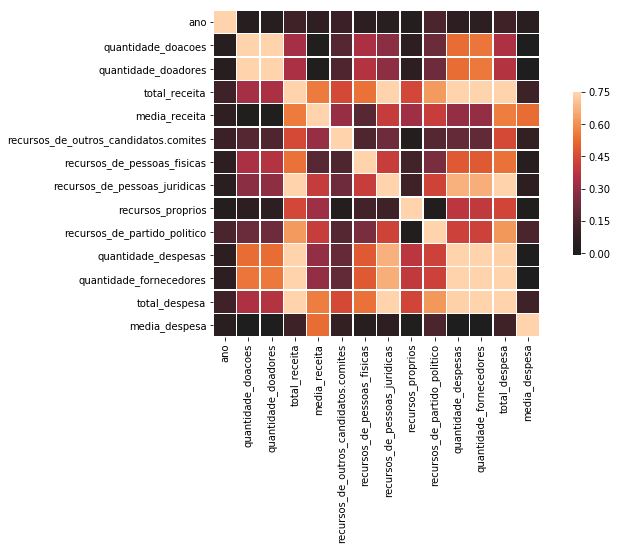

In [82]:
sns.heatmap(train.corr(), vmax=0.75, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Avaliando o heat map, podemos perceber que as variáveis quantidade_doacoes e quantidade_doadores têm correlação forte entre si (próximo a .7), podendo eliminar uma delas. Também as variáveis total_receita, recursos_de_pessoas_juridicas, quantidade_despesas e quantidade_fornecedores possuem forte correlação com total_despesa (próximo a 0.75), podendo ficar apenas com total_despesa.

In [83]:
train = train.drop(['quantidade_doadores', 'total_receita','recursos_de_pessoas_juridicas', 'quantidade_despesas', 'quantidade_fornecedores'], axis=1)

In [165]:
test = test.drop(['quantidade_doadores', 'total_receita','recursos_de_pessoas_juridicas', 'quantidade_despesas', 'quantidade_fornecedores'], axis=1)

In [84]:
train.head()
#test.head()

,ano,uf,partido,quantidade_doacoes,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_proprios,recursos_de_partido_politico,total_despesa,media_despesa,sexo,situacao
0,2006,AP,PT,6,2766.67,0.0,9000.0,1300.0,0.0,16583.60,1184.54,MASCULINO,nao_eleito
1,2006,RO,PT,13,1755.85,6625.0,15000.0,201.0,0.0,20325.99,846.92,FEMININO,nao_eleito
2,2006,AP,PT,17,9301.22,2250.0,34150.0,59500.0,0.0,146011.70,1187.09,FEMININO,eleito
3,2006,MS,PRONA,6,500.19,0.0,1150.0,750.0,0.0,3001.12,375.14,MASCULINO,nao_eleito
4,2006,RO,PT,48,2496.25,0.0,50878.0,68942.0,0.0,116416.64,875.31,MASCULINO,eleito


# Gerando a descrição dos dados e a soma dos valores NA
Como vemos, não falta nenhum dado dos que serão utilizados, logo, não precisamos tratar os valores ausentes.

In [85]:
print(train.describe())
train.isna().sum()

               ano  quantidade_doacoes  media_receita  \
count  7622.000000         7622.000000    7622.000000   
mean   2008.120703           27.673839    5456.131027   
std       1.996485          116.511888   14003.313610   
min    2006.000000            1.000000       0.000000   
25%    2006.000000            4.000000     625.000000   
50%    2010.000000            9.000000    1537.775000   
75%    2010.000000           23.000000    4666.247500   
max    2010.000000         6997.000000  500180.000000   

       recursos_de_outros_candidatos.comites  recursos_de_pessoas_fisicas  \
count                           7.622000e+03                 7.622000e+03   
mean                            1.965750e+04                 2.315820e+04   
std                             1.041636e+05                 6.689215e+04   
min                             0.000000e+00                 0.000000e+00   
25%                             0.000000e+00                 0.000000e+00   
50%                     

ano                                      0
uf                                       0
partido                                  0
quantidade_doacoes                       0
media_receita                            0
recursos_de_outros_candidatos.comites    0
recursos_de_pessoas_fisicas              0
recursos_proprios                        0
recursos_de_partido_politico             0
total_despesa                            0
media_despesa                            0
sexo                                     0
situacao                                 0
dtype: int64

# Verificando a necessidade de normalização.
Plotando as distribuições das variáveis restantes não categóricas (forma original e já normalizada com log). Vemos que usando log, o formato das distribuições fica mais parecido com a normal.

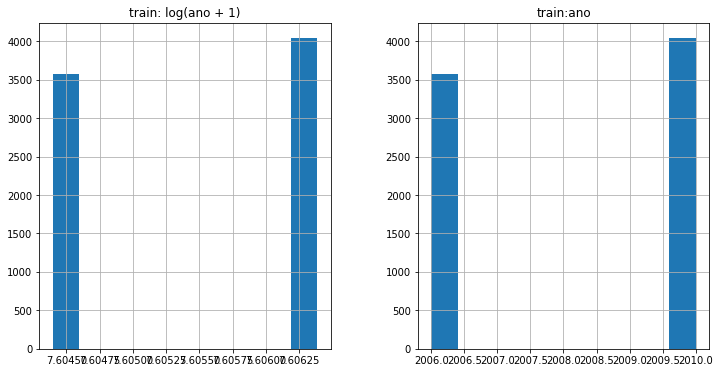

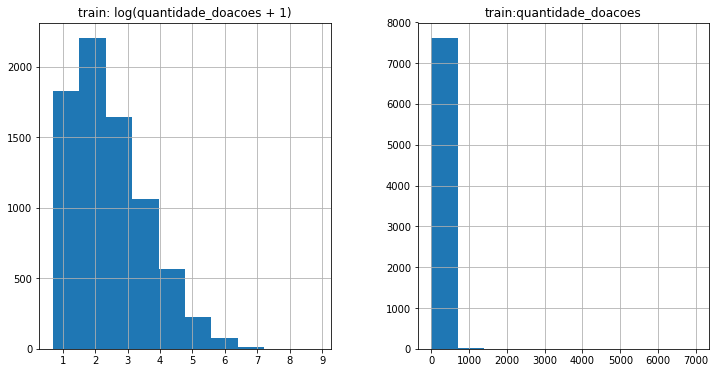

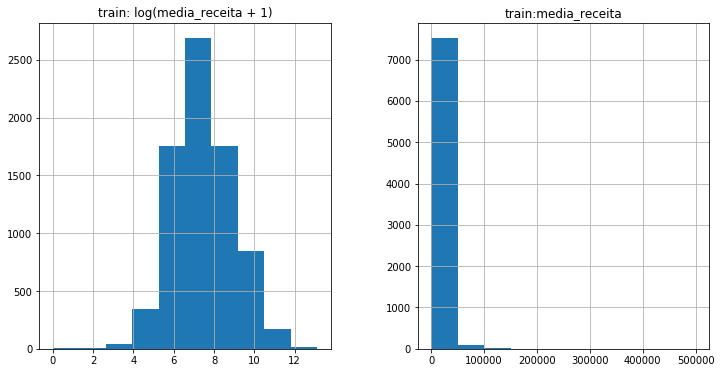

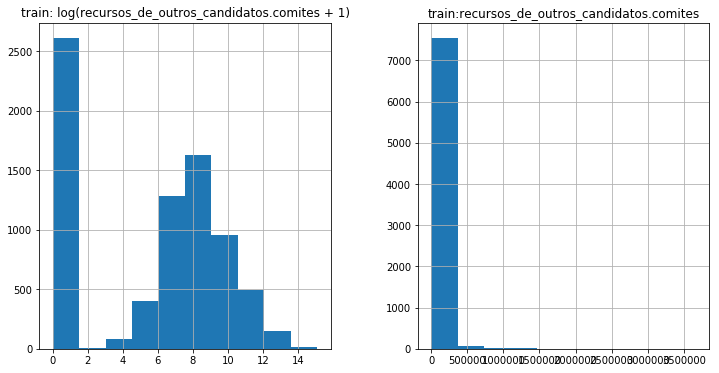

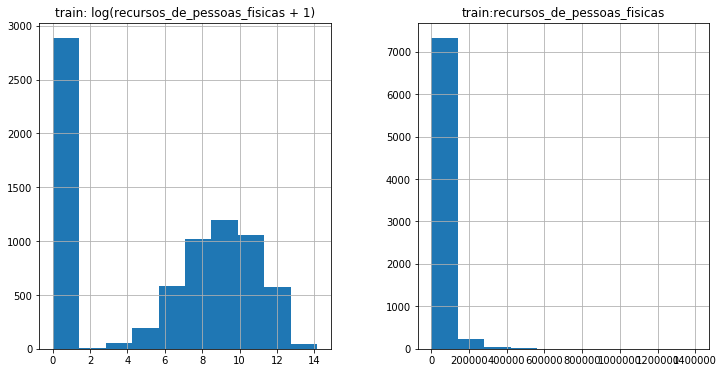

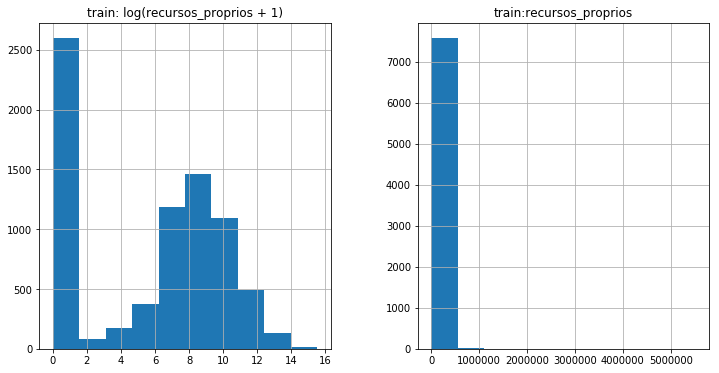

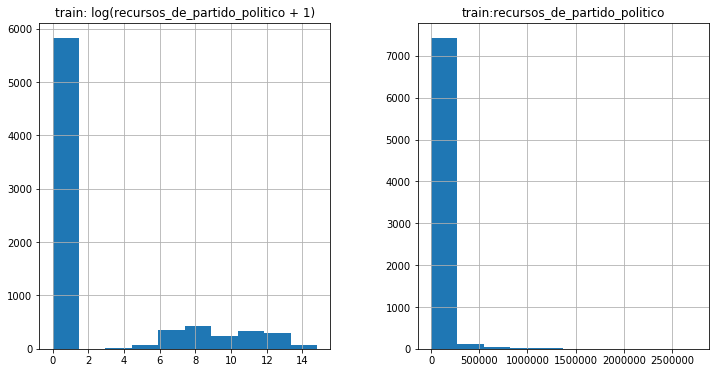

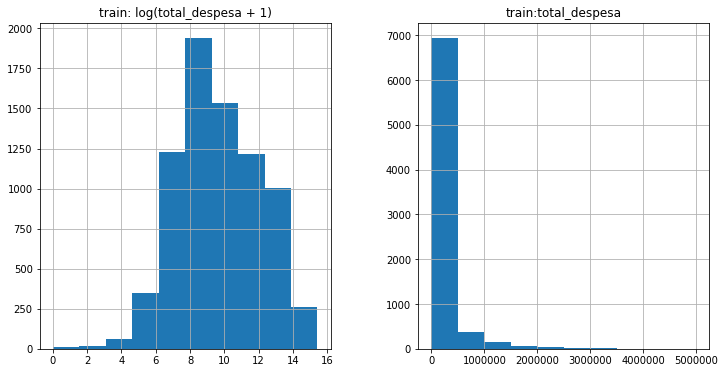

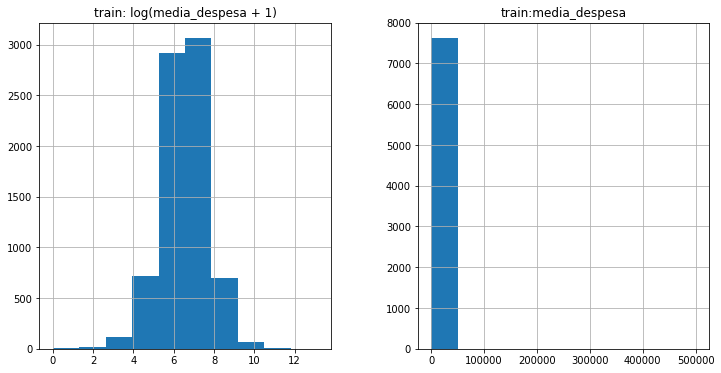

In [86]:
df_all = pd.DataFrame(train)
for column in df_all:
    if df_all[column].dtype != 'object':
        matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
        train_hists = pd.DataFrame({"train:"+column:train[column], "train: log("+column+" + 1)":np.log1p(train[column])})
        train_hists.hist()
        plt.show()

In [87]:
#separando as features da variavel alvo
train_feats = train.loc[:,'ano':'sexo']
train_target =  train[['ano','situacao']]
train_target.head()

,ano,situacao
0,2006,nao_eleito
1,2006,nao_eleito
2,2006,eleito
3,2006,nao_eleito
4,2006,eleito


In [88]:
#log transform skewed numeric features (train):
numeric_feats = train_feats.dtypes[train_feats.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

train_feats[skewed_feats] = np.log1p(train_feats[skewed_feats])

#dummyfying
train_feats = pd.get_dummies(train_feats)

#log transform skewed numeric features (test):
numeric_feats = test.dtypes[test.dtypes != "object"].index

skewed_feats = test[numeric_feats].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

test[skewed_feats] = np.log1p(test[skewed_feats])

#dummyfying
test = pd.get_dummies(test)

In [167]:
test.head()

,ano,sequencial_candidato,quantidade_doacoes,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_proprios,recursos_de_partido_politico,total_despesa,media_despesa,...,partido_PSOL,partido_PSTU,partido_PT,partido_PT do B,partido_PTB,partido_PTC,partido_PTN,partido_PV,sexo_FEMININO,sexo_MASCULINO
0,2014,10000000135,1.386294,6.268471,0.000000,7.313887,0.000000,4.394449,7.365813,6.268471,...,1,0,0,0,0,0,0,0,0,1
1,2014,10000000142,1.791759,6.456770,0.000000,8.039480,0.000000,4.394449,8.049114,6.258950,...,1,0,0,0,0,0,0,0,0,1
2,2014,10000000158,3.713572,9.038464,7.562198,11.092869,11.652696,0.000000,12.697320,7.721025,...,0,0,0,0,0,0,0,0,0,1
3,2014,10000000161,3.401197,8.595100,10.574474,11.138739,8.826758,10.126671,12.392623,7.480530,...,0,0,1,0,0,0,0,0,0,1
4,2014,10000000163,5.081404,8.435486,9.210440,12.757293,11.264477,10.126671,13.248824,6.999760,...,0,0,1,0,0,0,0,0,0,1


## Dividindo os dados em treino (2006), validation (2010), feat e alvo.

In [89]:
#train
train_X = train_feats.loc[train_feats['ano'] == 2006]
train_X = train_X.drop(['ano'],axis=1)
train_Y = train_target.loc[train_feats['ano'] == 2006]
train_Y = train_Y.drop(['ano'],axis=1)

#validation
validation_X = train_feats.loc[train_feats['ano'] == 2010]
validation_X =validation_X.drop(['ano'],axis=1)
validation_Y = train_target.loc[train_feats['ano'] == 2010]
validation_Y = validation_Y.drop(['ano'],axis=1)

#test 
test = test.drop(['ano'],axis=1)

In [90]:
train_X.head()

,quantidade_doacoes,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_proprios,recursos_de_partido_politico,total_despesa,media_despesa,uf_AC,uf_AL,...,partido_PSOL,partido_PSTU,partido_PT,partido_PT do B,partido_PTB,partido_PTC,partido_PTN,partido_PV,sexo_FEMININO,sexo_MASCULINO
0,1.945910,7.925761,0.000000,9.105091,7.170888,0.0,9.716230,7.077954,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2.639057,7.471278,8.798757,9.615872,5.308268,0.0,9.919705,6.742786,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2.890372,9.138008,7.719130,10.438547,10.993748,0.0,11.891449,7.080102,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1.945910,6.216985,0.000000,7.048386,6.621406,0.0,8.007074,5.929961,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.891820,7.822945,0.000000,10.837206,11.141035,0.0,11.664939,6.775720,0,0,...,0,0,1,0,0,0,0,0,0,1


In [91]:
train_Y.head()

,situacao
0,nao_eleito
1,nao_eleito
2,eleito
3,nao_eleito
4,eleito


In [92]:
validation_X.head()

,quantidade_doacoes,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_proprios,recursos_de_partido_politico,total_despesa,media_despesa,uf_AC,uf_AL,...,partido_PSOL,partido_PSTU,partido_PT,partido_PT do B,partido_PTB,partido_PTC,partido_PTN,partido_PV,sexo_FEMININO,sexo_MASCULINO
3581,3.610918,9.388784,12.503138,10.975944,11.463068,0.000000,12.852868,8.864023,1,0,...,0,0,0,0,0,0,0,0,1,0
3582,1.386294,7.754053,0.000000,0.000000,7.313887,0.000000,8.852379,7.754053,1,0,...,0,0,0,0,0,0,0,0,0,1
3583,1.386294,6.420532,5.673323,7.313887,3.931826,0.000000,7.518064,6.420532,1,0,...,0,0,0,0,0,0,0,0,0,1
3584,0.693147,6.089045,6.089045,0.000000,0.000000,0.000000,6.089045,6.089045,1,0,...,0,0,0,0,0,0,0,0,1,0
3585,2.772589,10.036604,0.000000,8.716208,9.296610,12.466516,12.357414,7.938927,1,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
validation_Y.head()

,situacao
3581,eleito
3582,nao_eleito
3583,nao_eleito
3584,nao_eleito
3585,eleito


## Label encoding para a variável alvo

In [95]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
classes = ['nao_eleito', 'eleito']
le.fit(classes)
print(le.classes_)
# Converting string labels into numbers.
#nao eleito to 1, eleito to 0
train_Y=le.fit_transform(train_Y)
print(train_Y)

validation_Y=le.fit_transform(validation_Y)
print(validation_Y)

#se quiser usar label encoding

['eleito' 'nao_eleito']
[1 1 0 ... 1 1 1]
[0 1 1 ... 1 1 1]


## Imports e funções utilizadas

In [96]:
from sklearn.model_selection import cross_val_score
from math import sqrt
import sklearn.metrics as met

# Questão 1
Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? Em que proporção? Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador? Como você poderia tratar isso? (1 pt.)

In [98]:
train["situacao"].value_counts()

nao_eleito    6596
eleito        1026
Name: situacao, dtype: int64

Como podemos ver, há sim um desbalanceamento entre as classes como esperado para o tipo de problema (muito mais candidatos não se elegem). As observações com situação "eleito" configuram em torno de 15,55% da situação 'nao_eleito" (ou, aproximadamente, 6:1) e 13,46% do total. 
Isso pode levar o classificador a ser enviesado pela classe majoritária, levando a predições pobres em relação à classe minoritária, podendo recair no paradoxo de acurácia, em que temos uma alta acurácia do classificador, porém não porque ele acerta muito, mas porque ele "chuta" todas as vezes na classe majoritária do train, mas ela também é majoritária no test (como provavelmente é este caso).
Poderíamos tratar isso usando oversampling da classe minoritária ou por cópia ou criando amostras sintéticas, usando, por exemplo, SMOTE.

### Update
Ao fazer os testes com resampling para a submissão no kaggle (outro notebook), verifiquei que os resultados usando oversampling com SMOTE (sintético) e com resampling da minoritária são piores, provavelmente porque também no test a classe de eleitos é menor e, ao fazer oversampling no treino, o modelo se condiciona a classificar mais entradas como eleito, sem realmente existirem.

# Questão 2
Treine: um modelo de regressão logística, KNN, uma árvore de decisão e um modelo de adaboost. Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.  (2 pts.)

# Questão 3
Reporte Precision, Recall e AUC-Precision&Recall no treino e validação. Há uma grande diferença de desempenho no treino/validação? Como você avalia os resultados? Justifique sua resposta. (2 pt.)

# Questão 4
Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo?  (2 pts.)

## Apresentarei as respostas das 3 questoes acima para cada modelo separadamente

## Regressão Logística

In [99]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=10, random_state=0)
lr.fit(train_X, train_Y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [100]:
print("Coeficientes: ",lr.coef_)
print("Valores inversos dos parâmetros de regularização",lr.Cs_)
print(lr.score(train_X, train_Y))
print(lr.score(validation_X, validation_Y))

Coeficientes:  [[-7.61512031e-01 -2.98605340e-01 -2.89965572e-02 -4.48433242e-02
   1.89889856e-02  1.39569850e-02 -1.07435662e+00 -4.96496878e-01
  -4.56128057e-01 -2.09813336e-01 -1.41706997e-01 -3.00663522e-01
  -6.87437472e-01 -4.51372525e-01  7.95196404e-01  5.06102850e-01
   6.56519781e-01 -5.67051282e-01  4.44751867e-01  3.78084331e-01
   6.95052750e-01 -3.41075691e-01 -6.06461096e-01 -2.35761974e-01
  -1.67746730e-02  2.25727835e-02 -1.75319501e-02 -5.40531437e-02
  -2.67678034e-01 -7.86113570e-01 -4.20517693e-02  4.73706972e-01
  -4.44865124e-01  1.43943697e+00  1.87254821e-01  0.00000000e+00
   5.11016284e-02 -4.69086381e-02  1.57766084e-02  8.06619237e-05
  -1.59149319e-01  1.87067802e-01 -7.52523004e-02  2.50341491e-01
  -5.79452913e-02  1.38963251e-01 -3.76348253e-01  2.12088038e-01
   0.00000000e+00 -1.01717122e-01 -1.27220859e-01  1.36187491e-01
   4.56874590e-02  1.27362598e-01 -3.93157319e-01  2.32980255e-01
   3.91100776e-01  6.79005512e-02 -1.66459035e-01  4.10727260

#### Nesta versão de Regressão logística do Scikit, já é incluída a cross-validation. A regularização usada é L2 e os valores (inversos) usados na regularização para cada uma das 10-fold estão mostradas acima. 

In [101]:
#Predict the response for train dataset
train_y_pred = lr.predict(train_X)

#Predict the response for train dataset
validation_y_pred = lr.predict(validation_X)

In [102]:
train_precision = met.precision_score(train_Y, train_y_pred)
validation_precision = met.precision_score(validation_Y, validation_y_pred)

train_recall = met.recall_score(train_Y, train_y_pred)
validation_recall = met.recall_score(validation_Y, validation_y_pred)

train_accuracy = met.accuracy_score(train_Y, train_y_pred)
validation_accuracy = met.accuracy_score(validation_Y, validation_y_pred)

precisions, recalls, thresholds = met.precision_recall_curve(train_Y, lr.predict_proba(train_X)[:,1])
train_area = met.auc(recalls, precisions)

precisions, recalls, thresholds = met.precision_recall_curve(validation_Y, lr.predict_proba(validation_X)[:,1])
validation_area = met.auc(recalls, precisions)

print("Train")
print("Acuracy: ", train_accuracy)
print("Precision: ", train_precision)
print("Recall: ", train_recall)
print("AUC - P&R: ", train_area)

print("Validation")
print("Acuracy: ", validation_accuracy)
print("Precision: ", validation_precision)
print("Recall: ", validation_recall)
print("AUC - P&R: ", validation_area)


Train
Acuracy:  0.9232058084333985
Precision:  0.9512116316639742
Recall:  0.9595827900912647
AUC - P&R:  0.9938944570733614
Validation
Acuracy:  0.9094283593170007
Precision:  0.9900805951642901
Recall:  0.905328798185941
AUC - P&R:  0.9952071522030906


Os resultados são satisfatórios, todos acima de 90% tanto no treino como na validação. A acurácia cai um pouco na validação (em torno de 0,02), o que é esperado. 

A precisão aumenta (0.04) mostrando que o modelo retorna melhores resultados em termos de fração de itens recuperados que são relevantes, ou seja, a fração de itens que ele classifica como uma classe e realmente pertencem a ela (fração sem falsos positivos). 

O recall cai em torno de 0.054, mostrando que o modelo falha mais na validação em relação à fração de itens de uma classe que realmente foram classificados como tal (fração sem falsos negativos), mesmo assim, o valor ainda é alto.

Area sob a curva P&R aumenta um pouco, em torno de 0.002, mostrando que a variação de precision e recall é bem pequena e que as métricas são igualmente boas para ambos os datasets. 

Sendo assim, vemos que o modelo traz bons resultados tanto no treino como na validação.

In [153]:
lr.coef_

array([[-7.61512031e-01, -2.98605340e-01, -2.89965572e-02,
        -4.48433242e-02,  1.89889856e-02,  1.39569850e-02,
        -1.07435662e+00, -4.96496878e-01, -4.56128057e-01,
        -2.09813336e-01, -1.41706997e-01, -3.00663522e-01,
        -6.87437472e-01, -4.51372525e-01,  7.95196404e-01,
         5.06102850e-01,  6.56519781e-01, -5.67051282e-01,
         4.44751867e-01,  3.78084331e-01,  6.95052750e-01,
        -3.41075691e-01, -6.06461096e-01, -2.35761974e-01,
        -1.67746730e-02,  2.25727835e-02, -1.75319501e-02,
        -5.40531437e-02, -2.67678034e-01, -7.86113570e-01,
        -4.20517693e-02,  4.73706972e-01, -4.44865124e-01,
         1.43943697e+00,  1.87254821e-01,  0.00000000e+00,
         5.11016284e-02, -4.69086381e-02,  1.57766084e-02,
         8.06619237e-05, -1.59149319e-01,  1.87067802e-01,
        -7.52523004e-02,  2.50341491e-01, -5.79452913e-02,
         1.38963251e-01, -3.76348253e-01,  2.12088038e-01,
         0.00000000e+00, -1.01717122e-01, -1.27220859e-0

In [154]:
print(train_X.columns.values)

['quantidade_doacoes' 'media_receita'
 'recursos_de_outros_candidatos.comites' 'recursos_de_pessoas_fisicas'
 'recursos_proprios' 'recursos_de_partido_politico' 'total_despesa'
 'media_despesa' 'uf_AC' 'uf_AL' 'uf_AM' 'uf_AP' 'uf_BA' 'uf_CE' 'uf_DF'
 'uf_ES' 'uf_GO' 'uf_MA' 'uf_MG' 'uf_MS' 'uf_MT' 'uf_PA' 'uf_PB' 'uf_PE'
 'uf_PI' 'uf_PR' 'uf_RJ' 'uf_RN' 'uf_RO' 'uf_RR' 'uf_RS' 'uf_SC' 'uf_SE'
 'uf_SP' 'uf_TO' 'partido_DEM' 'partido_PAN' 'partido_PC do B'
 'partido_PCB' 'partido_PCO' 'partido_PDT' 'partido_PFL' 'partido_PHS'
 'partido_PL' 'partido_PMDB' 'partido_PMN' 'partido_PP' 'partido_PPS'
 'partido_PR' 'partido_PRB' 'partido_PRONA' 'partido_PRP' 'partido_PRTB'
 'partido_PSB' 'partido_PSC' 'partido_PSDB' 'partido_PSDC' 'partido_PSL'
 'partido_PSOL' 'partido_PSTU' 'partido_PT' 'partido_PT do B'
 'partido_PTB' 'partido_PTC' 'partido_PTN' 'partido_PV' 'sexo_FEMININO'
 'sexo_MASCULINO']


Pelos coeficientes dados aos atributos podemos perceber os atributos de maior importância para este modelo de regressão logística (maiores valores). São eles: total_despesa(-1.07435662e+00) e uf_SP (1.43943697e+00). Aparentemente o valor que se gasta com a campanha impacta no número de votos obtidos e, como o estado de SP tem "direito" a mais deputados, os dados tem mais candidatos e mais eleitos no estado, o classificador usa o estado como um indicador de se vai ser eleito ou não. O coeficiente do estado de SP indica que o classificador o utiliza com um pouco mais de "força" na hora de decidir. Em geral, este é o modelo dos indicados na questão 2 que apresenta melhores resultados de métricas. 

## KNN

Best MSE:  0.0974474217255723
Best number of neighbors:  12


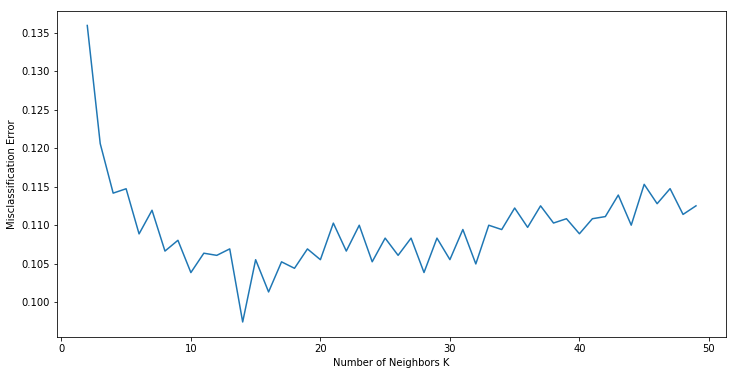

In [103]:
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
neighbors = range(2,50)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X, train_Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
series_knn = pd.Series(MSE, index = neighbors)
print('Best MSE: ',series_knn.min())
print('Best number of neighbors: ',series_knn.values.argmin())

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


#### O parâmetro a ser "tunado" no KNN é o número de vizinhos. Através de crossvalidation, obtivemos um número ótimo de 12 vizinhos apresentando o menor MSE (0.097). No KNN, o controle de overfitting é realizado escolhendo um número não tão pequeno de vizinhos, evitando que a predição seja realizada apenas por vizinhos que compõem ruído. Valores muito grandes de vizinhos também devem ser evitados para não ocorrer uma simplificação excessiva do modelo, perdendo alguns dados importantes. Considerei o valor 12 um número razoável para esta etapa.

In [104]:
#criando o knn com 12 vizinhos
knn = KNeighborsClassifier(n_neighbors=12)

#Train the model using the training sets
knn.fit(train_X, train_Y)

#Predict the response for train dataset
train_y_pred = knn.predict(train_X)

#Predict the response for train dataset
validation_y_pred = knn.predict(validation_X)

In [105]:
#Calculating Precision, Recall and AUC-recision-recall for train and validation
train_precision = met.precision_score(train_Y, train_y_pred)
validation_precision = met.precision_score(validation_Y, validation_y_pred)

train_recall = met.recall_score(train_Y, train_y_pred)
validation_recall = met.recall_score(validation_Y, validation_y_pred)

train_accuracy = met.accuracy_score(train_Y, train_y_pred)
validation_accuracy = met.accuracy_score(validation_Y, validation_y_pred)

precisions, recalls, thresholds = met.precision_recall_curve(train_Y, knn.predict_proba(train_X)[:,1])
train_area = met.auc(recalls, precisions)

precisions, recalls, thresholds = met.precision_recall_curve(validation_Y, knn.predict_proba(validation_X)[:,1])
validation_area = met.auc(recalls, precisions)

print("Train")
print("Acuracy: ", train_accuracy)
print("Precision: ", train_precision)
print("Recall: ", train_recall)
print("AUC - P&R: ", train_area)

print("Validation")
print("Acuracy: ", validation_accuracy)
print("Precision: ", validation_precision)
print("Recall: ", validation_recall)
print("AUC - P&R: ", validation_area)


Train
Acuracy:  0.9209717955878246
Precision:  0.9499192245557351
Recall:  0.9582790091264668
AUC - P&R:  0.9940379233339725
Validation
Acuracy:  0.9037366988369215
Precision:  0.9783602560195063
Recall:  0.9098639455782312
AUC - P&R:  0.9922197538189337


Não há grande diferença nos resultados entre treino e validação, pois a acurácia só cai 0,02, mostrando que o modelo treinado também acerta muito na validação. 

A precisão aumenta 0.028, mostrando que o modelo retorna melhores resultados em termos de fração de itens recuperados que são relevantes, ou seja, a fração de itens que ele classifica como uma classe e realmente pertencem a ela (fração sem falsos positivos).

O recall cai em torno de 0.05, mostrando que o modelo falha mais na validação em relação à fração de itens de uma classe que realmente foram classificados como tal (fração sem falsos negativos), mesmo assim, o valor ainda é alto.

A área sob a curva P&R cai muito pouco, em torno de 0.002, mostrando que a variação de precision e recall entre os dois datasets não é relevante de forma a invalidar o modelo.

Sendo assim, vemos que o modelo traz bons resultados tanto no treino como na validação, com todas as métricas reportadas tendo valores maiores que 90%.

## Árvore de Decisão

Best MSE:  0.09659772687338575
Best max depth:  2


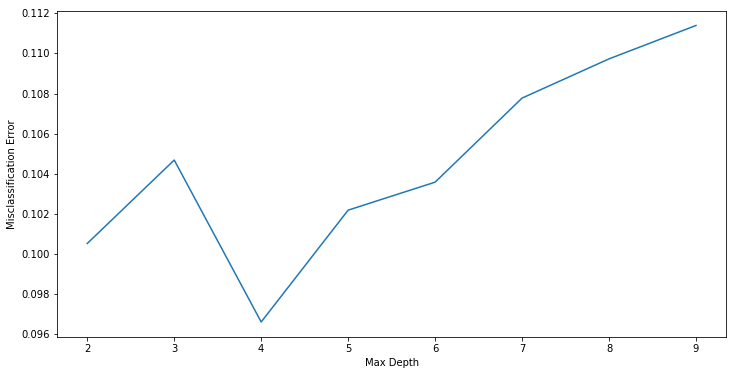

In [118]:
from sklearn.tree import DecisionTreeClassifier 

max_depth = range(2,10)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in max_depth:
    dt = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt, train_X, train_Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
series_dt = pd.Series(MSE, index = max_depth)
print('Best MSE: ',series_dt.min())
print('Best max depth: ',series_dt.values.argmin()) #índice do melhor valor

# plot misclassification error vs k
plt.plot(max_depth, MSE)
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Error')
plt.show()

Best MSE:  0.09713534314303052
Best min impurity:  2


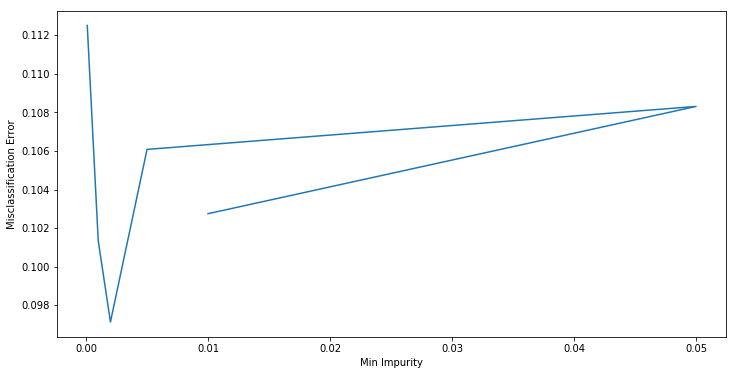

In [114]:
min_impurity = [0.0001, 0.001, 0.002, 0.005, 0.05, 0.01]
cv_scores = []

# perform 10-fold cross validation
for k in min_impurity:
    dt = DecisionTreeClassifier(min_impurity_decrease=k)
    scores = cross_val_score(dt, train_X, train_Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
series_dt = pd.Series(MSE, index = min_impurity)
print('Best MSE: ',series_dt.min())
print('Best min impurity: ',series_dt.values.argmin()) #índice do melhor valor

# plot misclassification error vs k
plt.plot(min_impurity, MSE)
plt.xlabel('Min Impurity')
plt.ylabel('Misclassification Error')
plt.show()

#### Para controlar o overfitting em árvores, pode-se trabalhar com uma profundidade máxima e com uma queda mínima de erro. Para isso, avaliamos alguns valores para esses dois parâmetros usando cross-validação, obtendo max_depth = 4 e min_impurity = 0.002.

In [124]:
dt = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.002)
dt.fit(train_X, train_Y)
#Predict the response for train dataset
train_y_pred = dt.predict(train_X)

#Predict the response for train dataset
validation_y_pred = dt.predict(validation_X)


In [125]:
#Calculating Precision, Recall and AUC-recision-recall for train and validation
train_precision = met.precision_score(train_Y, train_y_pred)
validation_precision = met.precision_score(validation_Y, validation_y_pred)

train_recall = met.recall_score(train_Y, train_y_pred)
validation_recall = met.recall_score(validation_Y, validation_y_pred)

train_accuracy = met.accuracy_score(train_Y, train_y_pred)
validation_accuracy = met.accuracy_score(validation_Y, validation_y_pred)

precisions, recalls, thresholds = met.precision_recall_curve(train_Y, dt.predict_proba(train_X)[:,1])
train_area = met.auc(recalls, precisions)

precisions, recalls, thresholds = met.precision_recall_curve(validation_Y, dt.predict_proba(validation_X)[:,1])
validation_area = met.auc(recalls, precisions)

print("Train")
print("Acuracy: ", train_accuracy)
print("Precision: ", train_precision)
print("Recall: ", train_recall)
print("AUC - P&R: ", train_area)

print("Validation")
print("Acuracy: ", validation_accuracy)
print("Precision: ", validation_precision)
print("Recall: ", validation_recall)
print("AUC - P&R: ", validation_area)


Train
Acuracy:  0.9162245182909802
Precision:  0.9653665097511769
Recall:  0.9357887874837028
AUC - P&R:  0.988164357516852
Validation
Acuracy:  0.8938381588715665
Precision:  0.9889555064689176
Recall:  0.8883219954648526
AUC - P&R:  0.9926522228529939


Os resultados são satisfatórios, todos de no mínimo 88% tanto no treino como na validação. A acurácia cai um pouco na validação (em torno de 0,02), o que é esperado.

A precisão aumenta (0.02) mostrando que o modelo retorna resultados com ainda menos sem falsos positivos.

O recall cai em torno de 0.05, mostrando que o modelo retorna amis falsos negativos na validação que no treino, mesmo assim, o valor ainda é considerado alto.

Area sob a curva P&R aumenta um pouco, em torno de 0.004, mostrando que a variação de precision e recall é bem pequena e que as métricas são igualmente boas para ambos os datasets.

Sendo assim, vemos que o modelo traz bons resultados tanto no treino como na validação. Porém, dentre os modelos já apresentados, é o que tem o pior resultado.

In [146]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.97155716, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02844284, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [148]:
print(train_X.columns.values)

['quantidade_doacoes' 'media_receita'
 'recursos_de_outros_candidatos.comites' 'recursos_de_pessoas_fisicas'
 'recursos_proprios' 'recursos_de_partido_politico' 'total_despesa'
 'media_despesa' 'uf_AC' 'uf_AL' 'uf_AM' 'uf_AP' 'uf_BA' 'uf_CE' 'uf_DF'
 'uf_ES' 'uf_GO' 'uf_MA' 'uf_MG' 'uf_MS' 'uf_MT' 'uf_PA' 'uf_PB' 'uf_PE'
 'uf_PI' 'uf_PR' 'uf_RJ' 'uf_RN' 'uf_RO' 'uf_RR' 'uf_RS' 'uf_SC' 'uf_SE'
 'uf_SP' 'uf_TO' 'partido_DEM' 'partido_PAN' 'partido_PC do B'
 'partido_PCB' 'partido_PCO' 'partido_PDT' 'partido_PFL' 'partido_PHS'
 'partido_PL' 'partido_PMDB' 'partido_PMN' 'partido_PP' 'partido_PPS'
 'partido_PR' 'partido_PRB' 'partido_PRONA' 'partido_PRP' 'partido_PRTB'
 'partido_PSB' 'partido_PSC' 'partido_PSDB' 'partido_PSDC' 'partido_PSL'
 'partido_PSOL' 'partido_PSTU' 'partido_PT' 'partido_PT do B'
 'partido_PTB' 'partido_PTC' 'partido_PTN' 'partido_PV' 'sexo_FEMININO'
 'sexo_MASCULINO']


Os atributos decisivos para o Decision Tree são total_despesa (0.97155716, de importância bem majoritária) e uf_SP(0.02844284). Aparentemente o valor que se gasta com a campanha impacta no número de votos e, como o estado de SP tem "direito" a mais deputados, os dados tem mais candidatos e mais eleitos no estado, o classificador usa o estado como um indicador de se vai ser eleito ou não.

## Adaboost

Best MSE:  0.09436308128392878
Best Num estimators:  7


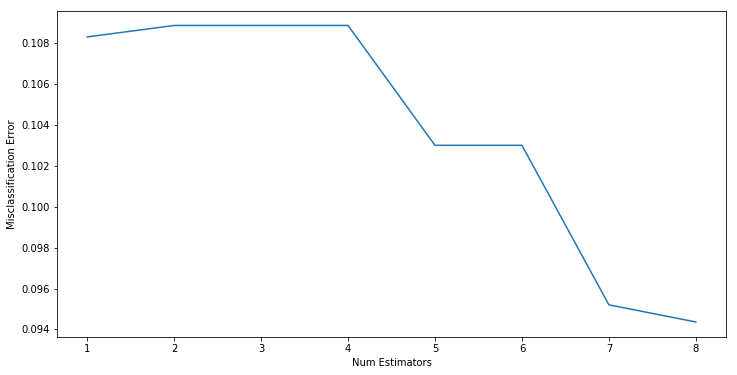

In [143]:
from sklearn.ensemble import AdaBoostClassifier
                                    
n_estimators = range(1,9)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in max_depth:
    ab = AdaBoostClassifier(n_estimators=k,  learning_rate=0.1)
    scores = cross_val_score(ab, train_X, train_Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
series_ab = pd.Series(MSE, index = n_estimators)
print('Best MSE: ',series_ab.min())
print('Best Num estimators: ',series_ab.values.argmin()) #índice do melhor valor

# plot misclassification error vs k
plt.plot(n_estimators, MSE)
plt.xlabel('Num Estimators')
plt.ylabel('Misclassification Error')
plt.show()

###### Apesar do Adaboost ser resistente a overfitting, ele ainda pode sofrer com esse problema, e para evitá-lo, é necessário controlar o número de classificadores utilizados. No caso desta implementação do Scikit o modelo termina com um máximo de 8 classificadores, então testamos qual número retorna menor erro através de cross-validation, obtendo o valor de 8 classificadores (usando DecisionTrees de max_depth=1, o default).

In [144]:
ab =  AdaBoostClassifier(n_estimators=8,  learning_rate=0.1)
ab.fit(train_X, train_Y)
#Predict the response for train dataset
train_y_pred = ab.predict(train_X)

#Predict the response for train dataset
validation_y_pred = ab.predict(validation_X)

In [145]:
#Calculating Precision, Recall and AUC-recision-recall for train and validation
train_precision = met.precision_score(train_Y, train_y_pred)
validation_precision = met.precision_score(validation_Y, validation_y_pred)

train_recall = met.recall_score(train_Y, train_y_pred)
validation_recall = met.recall_score(validation_Y, validation_y_pred)

train_accuracy = met.accuracy_score(train_Y, train_y_pred)
validation_accuracy = met.accuracy_score(validation_Y, validation_y_pred)

precisions, recalls, thresholds = met.precision_recall_curve(train_Y, ab.predict_proba(train_X)[:,1])
train_area = met.auc(recalls, precisions)

precisions, recalls, thresholds = met.precision_recall_curve(validation_Y, ab.predict_proba(validation_X)[:,1])
validation_area = met.auc(recalls, precisions)

print("Train")
print("Acuracy: ", train_accuracy)
print("Precision: ", train_precision)
print("Recall: ", train_recall)
print("AUC - P&R: ", train_area)

print("Validation")
print("Acuracy: ", validation_accuracy)
print("Precision: ", validation_precision)
print("Recall: ", validation_recall)
print("AUC - P&R: ", validation_area)

Train
Acuracy:  0.905892208880201
Precision:  0.9684391080617496
Recall:  0.9201434159061278
AUC - P&R:  0.990165436460623
Validation
Acuracy:  0.8812175204157386
Precision:  0.9906632324533161
Recall:  0.8721655328798186
AUC - P&R:  0.9907997766767443


Os resultados são satisfatórios, todos de no mínimo 87% tanto no treino como na validação, mas começam a cair em relação aos demais. A acurácia cai um pouco na validação (em torno de 0,02), o que é esperado.

A precisão aumenta (0.02) mostrando que o modelo retorna resultados com ainda menos sem falsos positivos.

O recall cai em torno de 0.05, mostrando que o modelo retorna mais falsos negativos na validação que no treino, mesmo assim, o valor ainda é considerado alto.

Area sob a curva P&R é quase igual mostrando que a variação de precision e recall é bem pequena e que as métricas são igualmente boas para ambos os datasets.

Sendo assim, vemos que o modelo traz bons resultados tanto no treino como na validação. Porém, dentre os modelos já apresentados, é o que tem o pior resultado na maioria das métricas, porém tem a melhor precisão tanto no train como no validtion.

In [150]:
ab.feature_importances_

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [151]:
print(train_X.columns.values)

['quantidade_doacoes' 'media_receita'
 'recursos_de_outros_candidatos.comites' 'recursos_de_pessoas_fisicas'
 'recursos_proprios' 'recursos_de_partido_politico' 'total_despesa'
 'media_despesa' 'uf_AC' 'uf_AL' 'uf_AM' 'uf_AP' 'uf_BA' 'uf_CE' 'uf_DF'
 'uf_ES' 'uf_GO' 'uf_MA' 'uf_MG' 'uf_MS' 'uf_MT' 'uf_PA' 'uf_PB' 'uf_PE'
 'uf_PI' 'uf_PR' 'uf_RJ' 'uf_RN' 'uf_RO' 'uf_RR' 'uf_RS' 'uf_SC' 'uf_SE'
 'uf_SP' 'uf_TO' 'partido_DEM' 'partido_PAN' 'partido_PC do B'
 'partido_PCB' 'partido_PCO' 'partido_PDT' 'partido_PFL' 'partido_PHS'
 'partido_PL' 'partido_PMDB' 'partido_PMN' 'partido_PP' 'partido_PPS'
 'partido_PR' 'partido_PRB' 'partido_PRONA' 'partido_PRP' 'partido_PRTB'
 'partido_PSB' 'partido_PSC' 'partido_PSDB' 'partido_PSDC' 'partido_PSL'
 'partido_PSOL' 'partido_PSTU' 'partido_PT' 'partido_PT do B'
 'partido_PTB' 'partido_PTC' 'partido_PTN' 'partido_PV' 'sexo_FEMININO'
 'sexo_MASCULINO']


O adaboost apenas está considerando o total_despesa em sua classificação.

# Questão 5
Foram feitas as submissões baseadas em modelos gerados em outros notebooks. O melhor modelo obtido foi gerado pelo LogisticRegressorCV com cv=10.
Disponível em: https://github.com/larissalucena/machinelearning/blob/master/Melhor%20modelo%20obtido%20para%20o%20Kaggle.ipynb
